In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as st
import numpy as np
import math
import seaborn as sns

/home/rodrigo/anaconda3/envs/py39/lib/python3.9/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.1
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
files=["sup_2_5_1.csv","unsup_2_5_1.csv"]
dfs=[]
for f in files:
    dfs.append(pd.read_csv(f"study_results/{f}"))
df = pd.concat(dfs,sort=False)
df["abs_freq_error"]=abs(df["freq_error"])
df["abs_phase_error"]=abs(df["phase_error"])
df["abs_freq_error_std"]=df["abs_freq_error"]
df["abs_phase_error_std"]=df["abs_phase_error"]
df["freq_mae"] = df["abs_freq_error"]
df["freq_std"] = df["abs_freq_error"]
df["phase_mae"] = df["abs_phase_error"]
df["phase_std"] = df["abs_phase_error"]

In [3]:
df.groupby(["water_suppression","model"]).agg({"freq_mae":"mean","freq_std":"std","phase_mae":"mean","phase_std":"std"})

freq_mae  freq_std  phase_mae  phase_std
water_suppression model                                                   
False             complex         0.014600  0.013147   0.182931   0.154234
                  control_ma      0.017664  0.015072   0.268607   0.246889
                  control_tapper  0.036873  0.048409   0.329465   0.308213
True              complex         0.330325  0.297446   2.446966   1.934899
                  control_ma      0.578778  0.587181   3.545599   2.805533
                  control_tapper  0.671415  0.720205   3.627293   2.947612

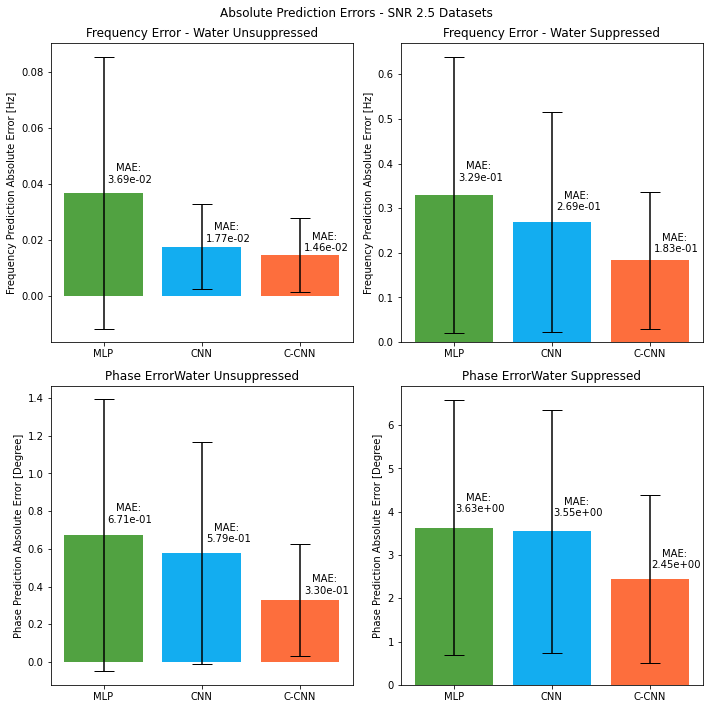

In [7]:



wsups = [False, True]
models = ["control_tapper","control_ma","complex"]
model_labels = ["MLP","CNN","C_CNN"]
colors = ['seagreen','dodgerblue','coral']
markers = ['o','^','s']
title_texts=[""]
colour_palette = {"control_tapper": "#51A241", "control_ma": "#13ADF0", "complex": "#FD6E3D"}
labels = ["MLP","CNN","C-CNN"]
cols=["freq","phase"]
order_dict={"control_tapper":1,"control_ma":2,"complex":3}
df = df[df["model"].isin(order_dict.keys())]

ylabels = ["Frequency Prediction Absolute Error [Hz]","Phase Prediction Absolute Error [Degree]"]
titles_p1 = ["Frequency Error - ","Phase Error"]
titles_p2 = ["Water Unsuppressed","Water Suppressed"]
offsets = [0.04,0.4,0.8,4]

fig,ax = plt.subplots(2,2,figsize=(10,10))

for i in range(0,2):
    for j in range(0,2):
        col = cols[j]

        i_df = df[df["water_suppression"]==wsups[i]].copy()
        i_df["mean"] = i_df[f"abs_{col}_error"]
        i_df["std"] = i_df[f"abs_{col}_error"]
        i_df = i_df.groupby("model").agg({"mean":"mean","std":"std"}).reset_index()
        i_df['order']=i_df.apply(lambda x: order_dict[x['model']],axis=1)
        i_df = i_df.sort_values("order")
        ax[i,j].bar(labels,i_df["mean"],yerr=i_df["std"],capsize=10,color=colour_palette.values())
        ax[i,j].set_ylabel(ylabels[i])
        ax[i,j].set_title(titles_p1[i]+titles_p2[j])
        mean_values = list(i_df["mean"])
        for k in range(3):
            ax[i,j].annotate(f"MAE: \n{mean_values[k]:.2e}",xy=(k+0.27,mean_values[k]*1.1),horizontalalignment="center")

fig.suptitle("Absolute Prediction Errors - SNR 2.5 Datasets")
fig.tight_layout()
#plt.show()
plt.savefig("figure4.jpg")

In [3]:
df.columns

Index(['Unnamed: 0', 'true_freq', 'pred_freq', 'freq_error', 'true_phase',
       'pred_phase', 'phase_error', 'model', 'water_suppression', 'snr',
       'training_run', 'abs_freq_error', 'abs_phase_error',
       'abs_freq_error_std', 'abs_phase_error_std'],
      dtype='object')

In [6]:
df.groupby(["model","water_suppression"]).agg({"abs_freq_error":"mean"}).reset_index().pivot(index="model",columns="water_suppression",values="abs_freq_error")

water_suppression,False,True
model,,
complex,0.014600,0.330325
control_ma,0.017664,0.578778
control_tapper,0.036873,0.671415


In [5]:
df.groupby(["model","water_suppression"]).agg({"abs_phase_error":"mean"}).reset_index().pivot(index="model",columns="water_suppression",values="abs_phase_error")

water_suppression,False,True
model,,
complex,0.182931,2.446966
control_ma,0.268607,3.545599
control_tapper,0.329465,3.627293


In [7]:
##sample
sample_data = {
    "complex":{
        "mean":1,
        "std":0.2,
    },
    "base":{
        "mean":1,
        "std":0.4
    }
}

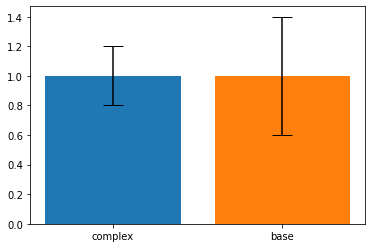

In [8]:
def make_bar_graph_comparison(data,ax):
    bar_means = [i["mean"] for i in data.values()]
    erro_bars = [i["std"] for i in data.values()]
    labels = [i for i in data]
    #colors = [i["color"] for i in data.values()]
    for i in range(len(data)):
        ax.bar(labels[i],bar_means[i],yerr=erro_bars[i],capsize=10)


    #x1,x2 = 0,1
    #y,h = 1.2,0.2
    #ax.plot([x1, x1, x2, x2], [y, y+h, y+h, y], lw=1.5, c='k')
    #ax.text((x1+x2)*.5, y+h, "*", ha='center', va='bottom')

wsups = [False,False,True,True]
phase = [False,True,False,True]


#fig,ax = plt.subplots(2,2)



fig,ax = plt.subplots()
make_bar_graph_comparison(sample_data,ax)
plt.show()

In [9]:
df.columns

Index(['Unnamed: 0', 'true_freq', 'pred_freq', 'freq_error', 'true_phase',
       'pred_phase', 'phase_error', 'model', 'water_suppression', 'snr',
       'training_run', 'abs_freq_error', 'abs_phase_error',
       'abs_freq_error_std', 'abs_phase_error_std', 'freq_mae', 'freq_std',
       'phase_mae', 'phase_std'],
      dtype='object')

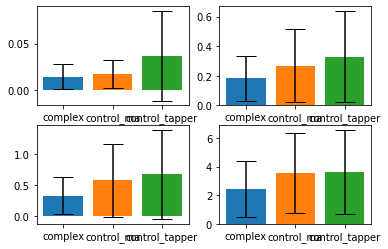

In [10]:
fig,ax = plt.subplots(2,2)


wsups = [False, True]

models = ["control_tapper","control_ma","complex"]
model_labels = ["MLP","CNN","C_CNN"]
colors = ['seagreen','dodgerblue','coral']
markers = ['o','^','s']
title_texts=[""]
colour_palette = {"control_tapper": "#51A241", "control_ma": "#13ADF0", "complex": "#FD6E3D"}
cols=["freq","phase"]

order_dict={"control_tapper":1,"control_ma":2,"complex":3}

df = df[df["model"].isin(order_dict.keys())]

for i in range(0,2):
    for j in range(0,2):
        col = cols[j]

        i_df = df[df["water_suppression"]==wsups[i]].copy()
        i_df["mean"] = i_df[f"abs_{col}_error"]
        i_df["std"] = i_df[f"abs_{col}_error"]
        i_df = i_df.groupby("model").agg({"mean":"mean","std":"std"}).reset_index()
        i_df['order']=i_df.apply(lambda x: order_dict[x['model']],axis=1)
        i_df = i_df.sort_values("order")
        data={}
        for k in range(i_df.shape[0]):
            data[i_df["model"][k]] = {
                "mean":i_df["mean"][k],
                "std":i_df["std"][k]
            }
        make_bar_graph_comparison(data,ax[i,j])
        
        
        

plt.show()

